# Ford GoBike Data Exploration
Some brief insights regarding the bike service GoBike

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe, print first 5 entries to gain general insight to the dataset
df=pd.read_csv('./201902-fordgobike-tripdata.csv')
df.head()
df.dropna(inplace=True)

## How long does the users use the service

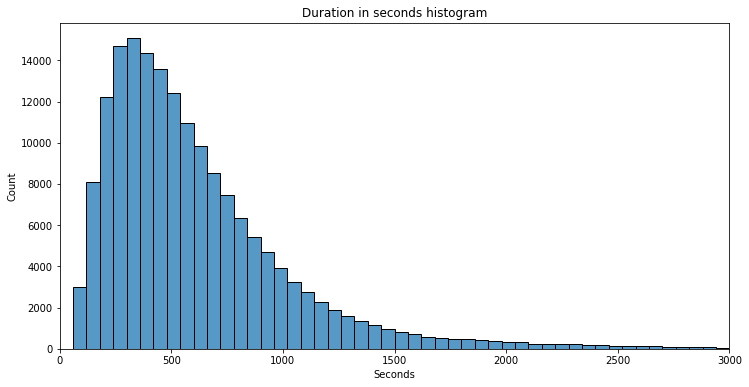

In [3]:
plt.figure(figsize=(12,6))
plt.title('Duration in seconds histogram')
plt.xlabel('Seconds')
plt.xlim((0,3000));
sb.histplot(data=df,x='duration_sec',bins=np.arange(0,3060,60));

#### Customers tend to travel in relatively short durations.

## What is the distribution of the **'member_birth_year'** feature?

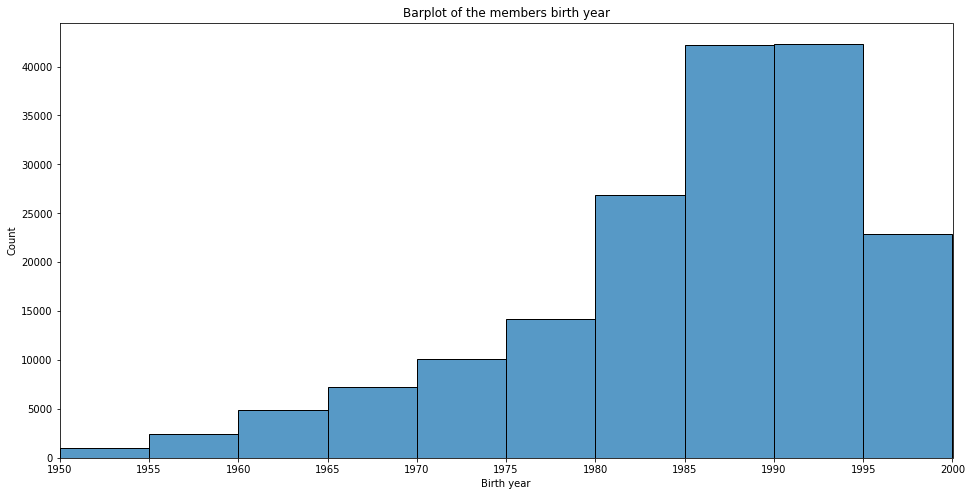

In [4]:
plt.figure(figsize=(16,8));
sb.histplot(data=df,x='member_birth_year',bins=np.arange(1950,2005,5))
plt.xticks(np.arange(1950,2005,5))
plt.xlabel('Birth year')
plt.title('Barplot of the members birth year');
plt.xlim((1950,2000));

The majority of the users are born between 1985 and 1995.

In [5]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_day']=df['start_time'].dt.dayofweek
df['start_hour']=df['start_time'].dt.hour

## The distrubution for renting bikes duration in minutes for genders,for different types of users.

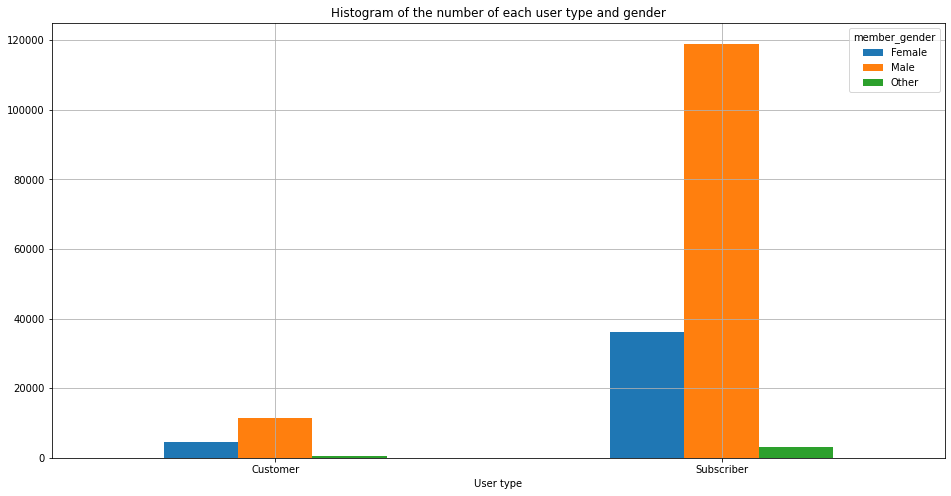

In [6]:
df['duration_min']=df['duration_sec']/60
df.groupby(['member_gender','user_type'])['member_gender'].count()
df.groupby('member_gender').user_type.value_counts().unstack(0).plot(kind='bar',figsize=(16,8))
plt.title('Histogram of the number of each user type and gender')
plt.xlabel('User type')
plt.grid()
plt.xticks(rotation=0);

#### This service has more subscribers than customers, and it appeals more to male members, with a huge margin compared to female members.

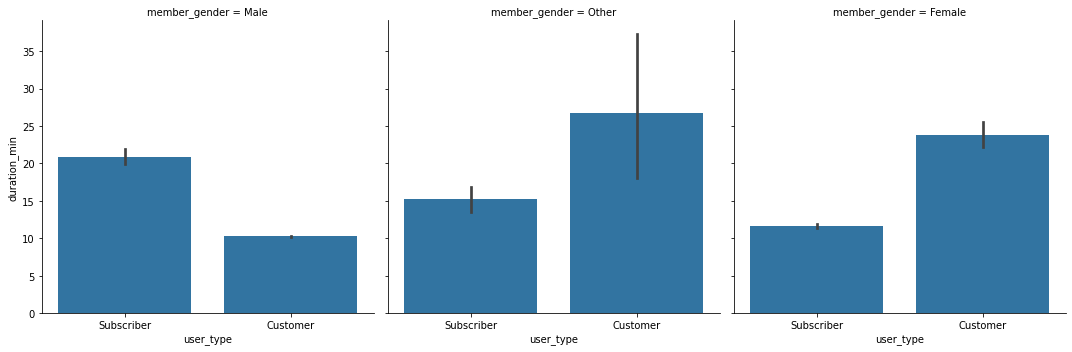

In [7]:
g = sb.FacetGrid(data = df, col = 'member_gender', height=5);
g.map(sb.barplot, 'user_type', 'duration_min');

Males tend rent bikes longer when they are subscribers, females and others go against this trend, from the prior plot we can ignore the **'other'** and build our conclusions from the remaining values, since they are a rarity in this dataset.

## what is the distrubution of the service members according to thier birth year and gender?

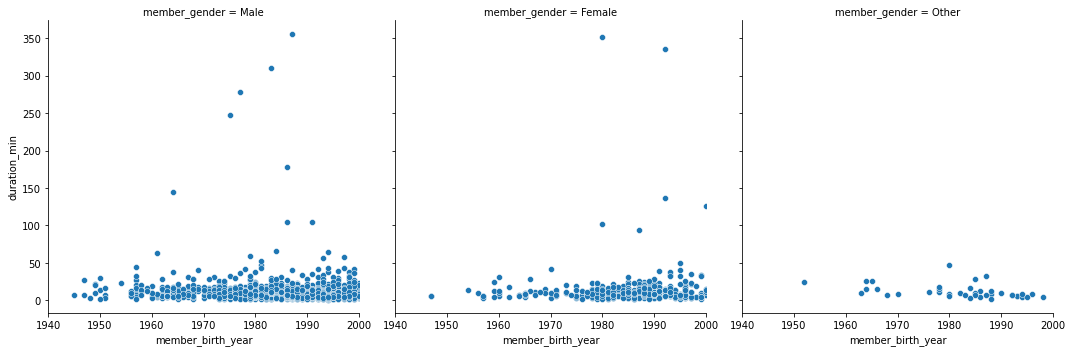

In [8]:
df_place_holder=df.sample(frac=0.01)
g = sb.FacetGrid(data = df_place_holder, col = 'member_gender', height=5);
plt.xlim((1940,2000))
g.map(sb.scatterplot, 'member_birth_year', 'duration_min');

As we can see above, there is a postive tendancy for longer duration of renting if the user is born near the 2000s

## How often do member use this service across different days of the week?

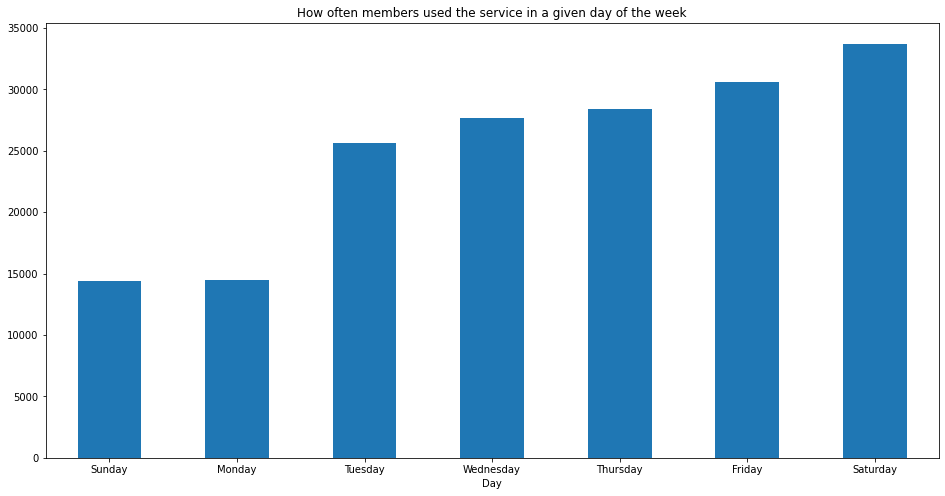

In [9]:
plt.figure(figsize=(16,8))
df['start_day'].value_counts(ascending=True).plot(kind='bar')
plt.xlabel('Day')
plt.title('How often members used the service in a given day of the week');
plt.xticks(np.arange(0,7,1),['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],rotation=0);

We can deduce that the number of users in each day of the week is similar, not correlated positively or negatively to weekends.

## Which hours are the busiest during the day?

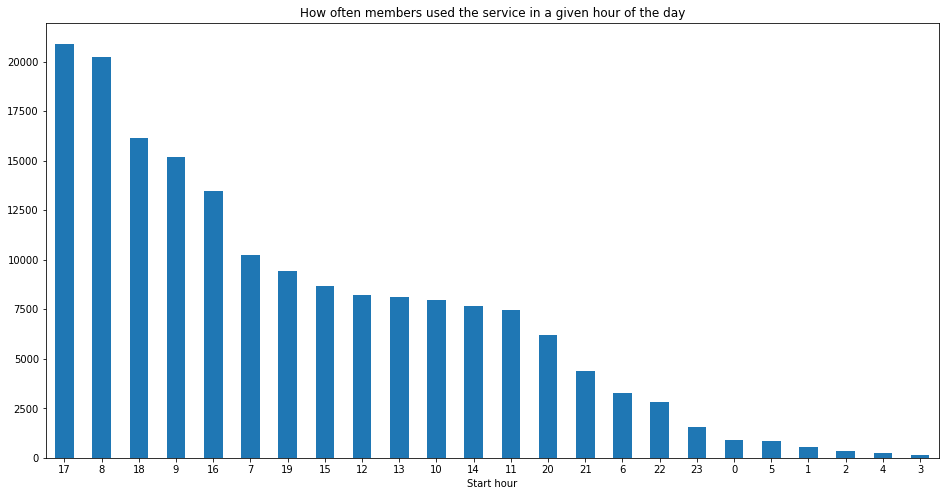

In [10]:
plt.figure(figsize=(16,8))
df['start_hour'].value_counts(ascending=False).plot(kind='bar')
plt.xticks(rotation=0);
plt.xlabel('Start hour');
plt.title('How often members used the service in a given hour of the day');

It's clear that most members use this service early in the morning 8am, and 6-7pm usually when they complete their 9 to 5 work shift.

## What is the total distance distribution for different days of the week. 

In [11]:
LATITUDE_TO_METERS=111151.29 # taken from http://www.csgnetwork.com/degreelenllavcalc.html
LONGITUDE_TO_METERS=111302.62 # taken from  http://www.csgnetwork.com/degreelenllavcalc.html
df['disp_latitude']=abs(df['start_station_latitude']-df['end_station_latitude'])
df['disp_longitude']=abs(df['start_station_longitude']-df['end_station_longitude'])
df['disp_meters']=abs(((df['disp_longitude']*LONGITUDE_TO_METERS)**2-(df['disp_latitude']*LATITUDE_TO_METERS)**2))**0.5

Total distance of the trips for customers and members in each day of the week


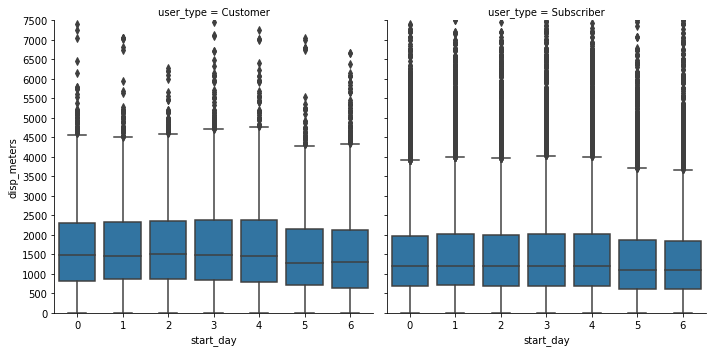

In [12]:
g = sb.FacetGrid(data = df, col = 'user_type', height=5);
plt.yticks(np.arange(0,8000,500));
plt.ylim((0,7500));
print('Total distance of the trips for customers and members in each day of the week')
plt.title('Total distance of the trips for customers and members in each day of the week');
g.map(sb.boxplot, 'start_day', 'disp_meters');

Majority of our users have trips with a total distance of 500m and 2000m.

##                                                Thank You :)